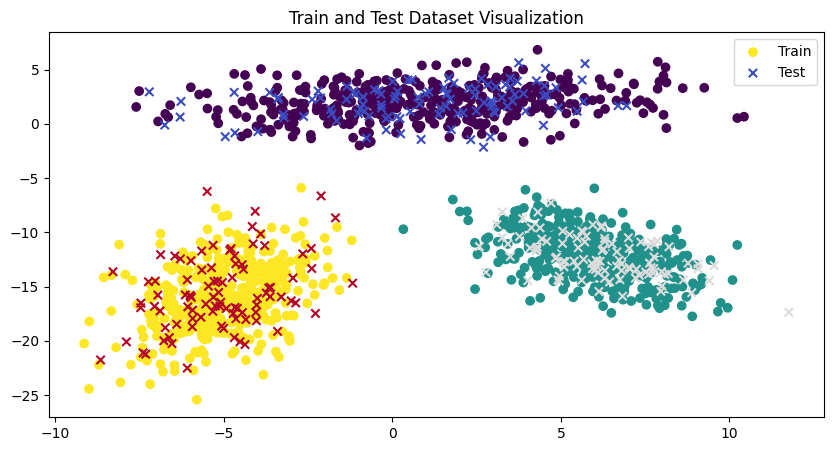

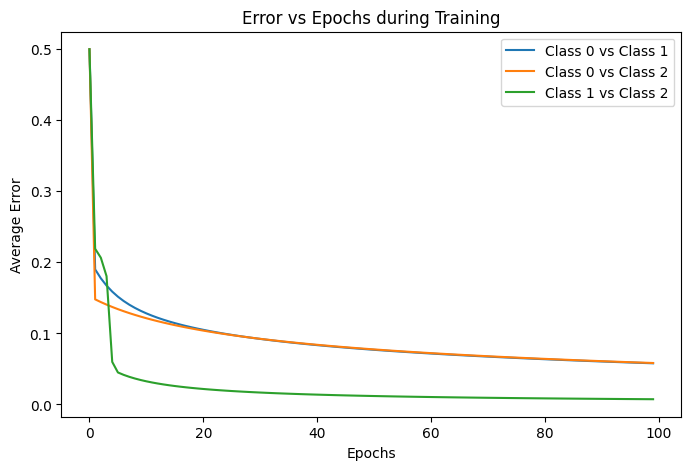

Decision Boundary for Class 0 vs Class 1


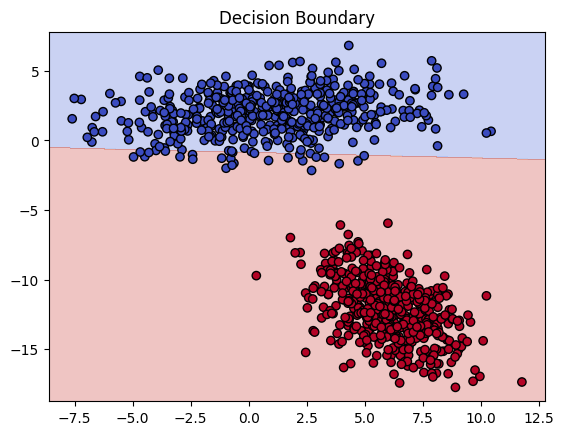

Decision Boundary for Class 0 vs Class 2


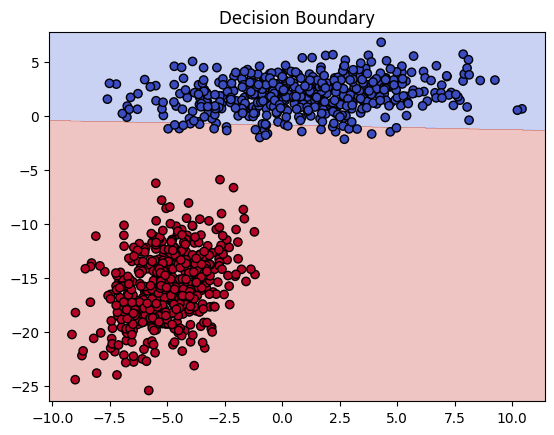

Decision Boundary for Class 1 vs Class 2


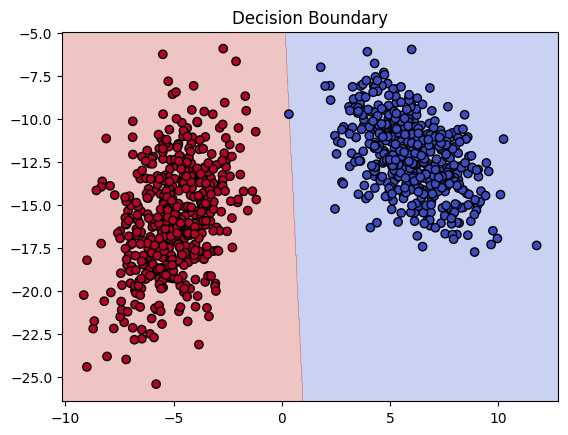

Overall Decision Boundary


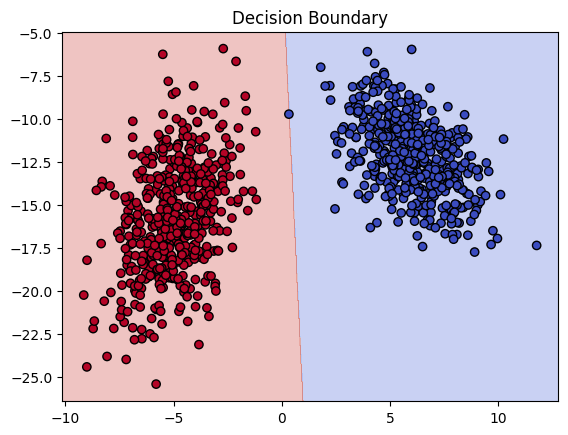

One-vs-One Perceptron Accuracy: 0.97


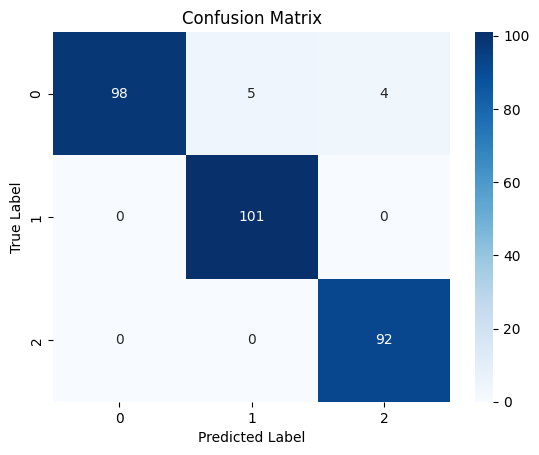

Inferences:
1. The perceptron model successfully separates the classes with some misclassifications.
2. The training error reduces over epochs, showing convergence.
3. The decision regions show distinct class separations, but some overlap exists.
4. The model achieved an accuracy of 0.97, which indicates its effectiveness for classification.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
df1 = pd.read_csv("Class1.txt", delimiter=" ", header=None)
df2 = pd.read_csv("Class2.txt", delimiter=" ", header=None)
df3 = pd.read_csv("Class3.txt", delimiter=" ", header=None)
df1["Class"] = 0
df2["Class"] = 1
df3["Class"] = 2
df = pd.concat([df1, df2, df3], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def plot_dataset(X_train, y_train, X_test, y_test):
    plt.figure(figsize=(10, 5))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', marker='o', label='Train')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', label='Test')
    plt.legend()
    plt.title("Train and Test Dataset Visualization")
    plt.show()
plot_dataset(X_train, y_train, X_test, y_test)

def train_perceptron(X, y, learning_rate=0.1, epochs=100):
    X_bias = np.hstack((np.ones((X.shape[0], 1)), X))
    W = np.zeros((X_bias.shape[1], 1))
    errors = []

    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    for _ in range(epochs):
        z = np.dot(X_bias, W)
        y_pred = sigmoid(z)
        error = y_pred - y.reshape(-1, 1)
        gradient = np.dot(X_bias.T, error) / len(y)
        W -= learning_rate * gradient
        errors.append(np.mean(np.abs(error)))

    return W, errors

classifiers = {}
errors_dict = {}
class_pairs = [(0,1), (0,2), (1,2)]
for class1, class2 in class_pairs:
    subset = df[(df['Class'] == class1) | (df['Class'] == class2)]
    X_train = subset[[0,1]].values
    y_train = (subset['Class'].values == class2).astype(int)

    W, errors = train_perceptron(X_train, y_train)
    classifiers[(class1, class2)] = W
    errors_dict[(class1, class2)] = errors

plt.figure(figsize=(8,5))
for (class1, class2), errors in errors_dict.items():
    plt.plot(errors, label=f'Class {class1} vs Class {class2}')
plt.xlabel("Epochs")
plt.ylabel("Average Error")
plt.title("Error vs Epochs during Training")
plt.legend()
plt.show()

def predict_ovo(X):
    votes = np.zeros((X.shape[0], len(np.unique(y))))
    X_bias = np.hstack((np.ones((X.shape[0], 1)), X))

    for (class1, class2), W in classifiers.items():
        pred = (1 / (1 + np.exp(-np.dot(X_bias, W))) >= 0.5).astype(int)
        for i in range(len(pred)):
            votes[i, class1 if pred[i] == 0 else class2] += 1

    return np.argmax(votes, axis=1)

def plot_decision_regions(X, y, classifier, resolution=0.02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    Z = classifier(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', cmap='coolwarm', edgecolor='k')
    plt.title("Decision Boundary")
    plt.show()

for (class1, class2), W in classifiers.items():
    subset = df[(df['Class'] == class1) | (df['Class'] == class2)]
    X_train = subset[[0,1]].values
    y_train = (subset['Class'].values == class2).astype(int)
    print(f"Decision Boundary for Class {class1} vs Class {class2}")
    plot_decision_regions(X_train, y_train, lambda x: (1 / (1 + np.exp(-np.dot(np.hstack((np.ones((x.shape[0], 1)), x)), W))) >= 0.5).astype(int))

print("Overall Decision Boundary")
plot_decision_regions(X_train, y_train, predict_ovo)


y_pred = predict_ovo(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"One-vs-One Perceptron Accuracy: {accuracy:.2f}")


conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


print("Inferences:")
print("1. The perceptron model successfully separates the classes with some misclassifications.")
print("2. The training error reduces over epochs, showing convergence.")
print("3. The decision regions show distinct class separations, but some overlap exists.")
print(f"4. The model achieved an accuracy of {accuracy:.2f}, which indicates its effectiveness for classification.")
